Rum Yue

### Credit Card Fraud Detection

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf

In [3]:
raw = pd.read_csv('creditcard.csv')

In [17]:
train = raw.copy()
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
train.isnull().values.any()

False

In [6]:
train.isnull().sum().max()

0

In [5]:
train['Class'].unique()

array([0, 1])

In [18]:
a = train['Class'].value_counts()[0] / len(train) * 100
b = train['Class'].value_counts()[1] / len(train) * 100

print('No frauds of proportion {} % of the whole dataset'.format(round(a, 2)))
print(' ')
print('Frauds of proportion {} % of the whole dataset'.format(round(b, 2)))

No frauds of proportion 99.83 % of the whole dataset
 
Frauds of proportion 0.17 % of the whole dataset


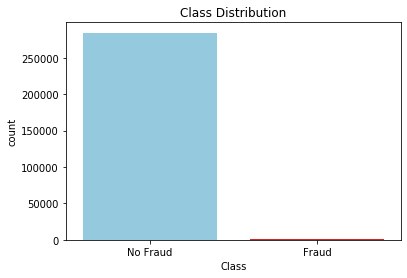

In [10]:
cc = ['skyblue', 'red']
tc = ['No Fraud', 'Fraud']

plt.figure(figsize = (6, 4))
sns.countplot('Class', data = train, palette = cc)
plt.title('Class Distribution')
plt.xticks(range(2), tc)
plt.show()

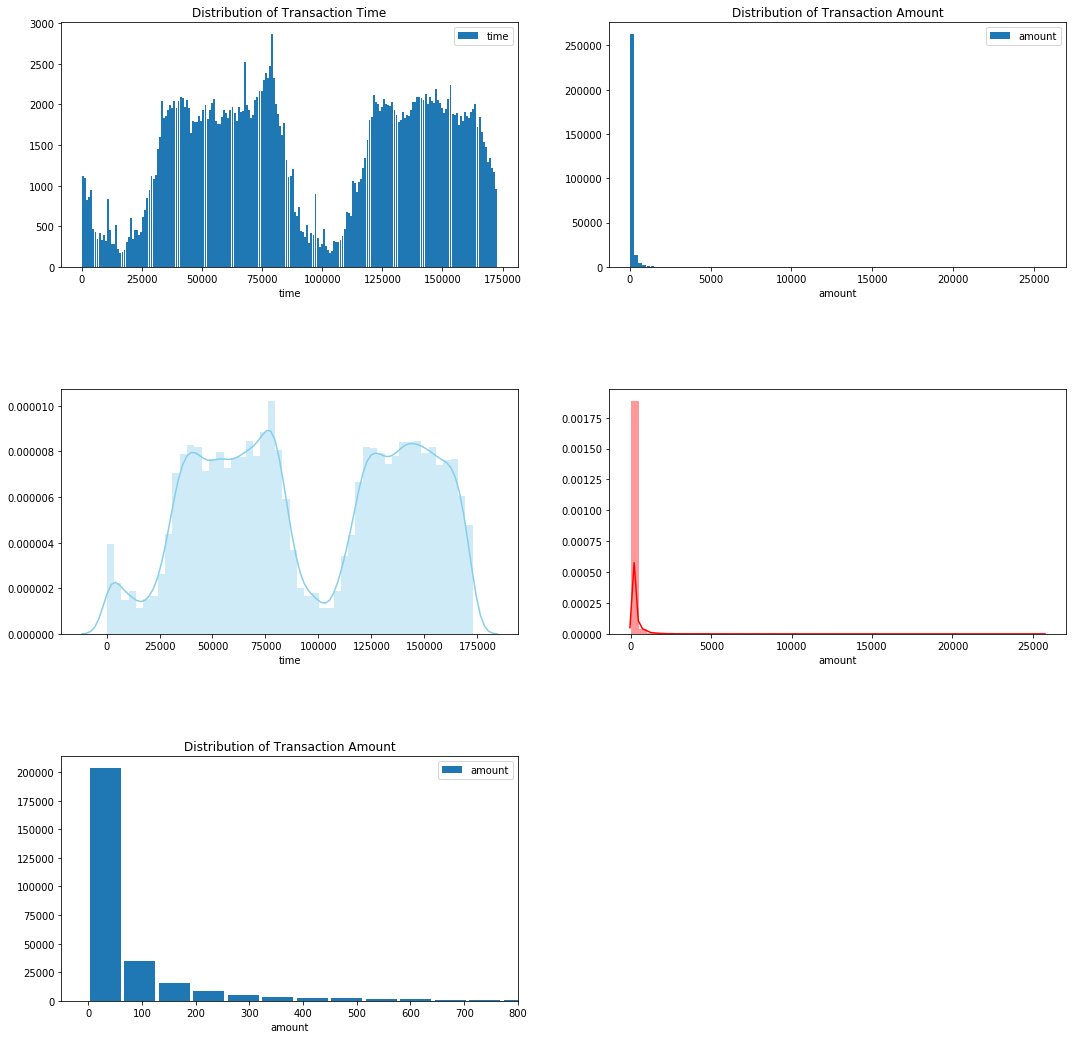

In [11]:
time = train['Time'].values
amt = train['Amount'].values
plt.figure(figsize = (18, 18))

plt.subplot(321)
plt.hist(time, bins = 200, label = 'time', rwidth = 0.9)
plt.title('Distribution of Transaction Time')
plt.xlabel('time')
plt.subplots_adjust(hspace = 0.5)
plt.legend()

plt.subplot(322)
plt.hist(amt, bins = 100, label = 'amount', rwidth = 0.9)
plt.title('Distribution of Transaction Amount')
plt.xlabel('amount')
plt.subplots_adjust(hspace = 0.5)
plt.legend()

plt.subplot(323)
sns.distplot(time, color='skyblue')
plt.xlabel('time')
plt.subplots_adjust(hspace = 0.5)

plt.subplot(324)
sns.distplot(amt, color='r')
plt.xlabel('amount')

plt.subplot(325)
plt.hist(amt, bins = 400, label = 'amount', rwidth = 0.9)
plt.xlim(-50, 800)
plt.title('Distribution of Transaction Amount')
plt.xlabel('amount')
plt.legend()

plt.show()

Scaling & Distributing

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [19]:
std_sc = StandardScaler()
rob_sc = RobustScaler()

# since the values are tuples we have to reshape to make them as 2 dim arrays
train['scaled_amount'] = rob_sc.fit_transform(train['Amount'].values.reshape(-1, 1))
train['scaled_time'] = rob_sc.fit_transform(train['Time'].values.reshape(-1, 1))

In [20]:
train.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [21]:
sc_amt = train['scaled_amount']
sc_tm = train['scaled_time']
train.drop(['scaled_time', 'scaled_amount'], axis = 1, inplace = True)

In [22]:
train.insert(0, 'scaled_amount', sc_amt)
train.insert(1, 'scaled_time', sc_tm)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

In [23]:
print('No frauds of proportion {} % of the whole dataset'.format(round(a, 2)))
print(' ')
print('Frauds of proportion {} % of the whole dataset'.format(round(b, 2)))

No frauds of proportion 99.83 % of the whole dataset
 
Frauds of proportion 0.17 % of the whole dataset


In [24]:
# we take the new_train without 'Class' column as X, when 'train' pertains the ''Class'' column 
X = train.drop('Class', axis=1, inplace = False)

## here notice the function of inplace = False / True, when True, the train will drop the 'Class' column and no more pertain this column in train
## when Flase, train will pertain the 'Class' column while X does not

In [26]:
y = train['Class']

In [32]:
ss = StratifiedKFold(n_splits = 5, random_state = None, shuffle = False)

for tr_ind, te_ind in ss.split(X, y):
    print('Train: ', tr_ind, 'Test: ', te_ind)
    orig_Xtrain, orig_Xtest = X.iloc[tr_ind], X.iloc[te_ind]
    orig_ytrain, orig_ytest = y.iloc[tr_ind], y.iloc[te_ind]

Train:  [ 30473  30496  31002 ... 284804 284805 284806] Test:  [    0     1     2 ... 57017 57018 57019]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train:  [     0      1      2 ... 227866 227867 227868] Test:  [212516 212644 213092 ... 284804 284805 284806]


In [33]:
orig_Xtrain = orig_Xtrain.values
orig_Xtest = orig_Xtest.values
orig_ytrain = orig_ytrain.values
orig_ytest = orig_ytest.values

In [34]:
train_unique_label, train_counts_label = np.unique(orig_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(orig_ytest, return_counts = True)
print(' ')
print('label distribution: \n')
print(train_unique_label / len(orig_ytrain))
print(test_unique_label / len(orig_ytest))

 
label distribution: 

[0.00000000e+00 4.38892936e-06]
[0.00000000e+00 1.75558716e-05]


In [35]:
train = train.sample(frac = 1)
fraud = train.loc[train['Class'] == 1]
non_fraud = train.loc[train['Class'] == 0][:492]

In [43]:
nor_dist_train = pd.concat([fraud, non_fraud])
new_train = nor_dist_train.sample(frac = 1, random_state = 42)

In [46]:
new_train.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
186765,1.188570,0.499912,-4.106622,-3.541271,0.104438,0.339032,1.392133,-0.542615,0.368533,-0.643416,...,-3.703525,-0.835920,1.831160,2.591728,0.813578,0.511317,-0.088159,0.852425,-1.190319,0
10204,-0.148257,-0.809161,-4.641893,2.902086,-1.572939,2.507299,-0.871783,-1.040903,-1.593901,-3.254905,...,-0.465679,1.963597,-0.217414,-0.549340,0.645545,-0.354558,-0.611764,-3.908080,-0.671248,1
222974,-0.293440,0.687402,-1.460399,0.947105,0.071779,-1.174776,0.849138,-0.803747,0.706304,0.168531,...,-0.394261,0.429681,1.100644,-0.374241,-0.338315,0.415683,-0.225369,-0.415763,0.074465,0
112840,0.321805,-0.139428,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,...,-0.510614,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,1
150715,-0.148117,0.108942,-11.397727,7.763953,-18.572307,6.711855,-10.174216,-4.395918,-15.893788,2.083013,...,0.208879,0.339007,1.342923,0.239217,0.534644,-0.174965,-0.500240,-1.722060,-0.574339,1


In [47]:
print('Distribution of Classes in subsample dataset')
print(new_train['Class'].value_counts() / len(new_train))

Distribution of Classes in subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


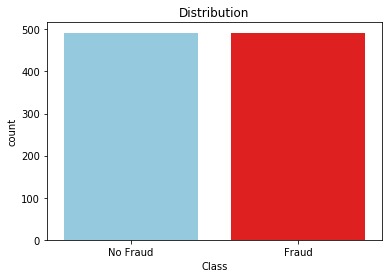

In [54]:
cc = ['skyblue', 'red']
tc = ['No Fraud', 'Fraud']
plt.figure(figsize = (6, 4))
sns.countplot('Class', data=new_train, palette=cc)
plt.title('Distribution')
plt.xticks(range(2), tc)

plt.show()

Learning Curves

In [55]:
X = new_train.drop('Class', axis = 1, inplace = False)
y = new_train['Class']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Then change the data type from dataframe to ndarray
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [67]:
clf = {
    'LogisiticRegression': LogisticRegression(),
    'KNearest': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier()}

In [77]:
for key, classifier in clf.items():
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print('Classifier: ', classifier.__class__.__name__, 'with training score', round(score.mean(), 2) * 100, '% accuracy \n')

Classifier:  LogisticRegression with training score 94.0 % accuracy 

Classifier:  KNeighborsClassifier with training score 93.0 % accuracy 

Classifier:  SVC with training score 93.0 % accuracy 

Classifier:  DecisionTreeClassifier with training score 90.0 % accuracy 



### TO BE CONTINUED